Glass Identification

Project Description:
    
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!


The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-

1.	 Id number: 1 to 214

2.	 RI: refractive index

3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

4.	Mg: Magnesium

5.	Al: Aluminum

6.	Si: Silicon

7.	K: Potassium

8.	Ca: Calcium

9.	Ba: Barium

10.	Fe: Iron

11.	Type of glass: (class attribute)

•	1- building_windows_float_processed

•	2- building_windows_non_float_processed

•	3- vehicle_windows_float_processed

•	4- vehicle_windows_non_float_processed (none in this database)

•	5- containers

•	6- tableware

•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Predict : Type of glass


Dataset Link-

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Glass%20Identification/Glass%20Identification.csv


*Statement Problem:To predict the Type of glass based on the their chemical properties as one of six classes classifying them into window glass (classes 1-4) and non-window glass (classes 5-7)*.

In [1]:
### importing libraries to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings ("ignore")

In [2]:
#Add/insert header to the dataset
link="https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Glass%20Identification/Glass%20Identification.csv"
header=['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type of glass']

glass_id=pd.read_csv(link,names=header)

In [3]:
glass_id

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass_id

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Observation:

This dataset contain the chemical component of glasses which classified the glass into types and the datas are numerical and categorical datas. There are 158 samples in the dataset with 11 columns of which 1 of it is a target variable ('Type of glass
')

In [5]:
#Columns present in the dataset 
glass_id.columns

Index(['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [6]:
#shape of the Data
glass_id.shape

(214, 11)

In [7]:
# Checking the column information
glass_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Observation:

The columns have different data types made up of 9 are floats Dtypes and 2 integers. 

No missing information.

In [8]:
# Check for missing values
glass_id.isnull().sum()

ID               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

There are no Null values in the dataset

In [9]:
#Unique values in each of the colums

glass_id.nunique().to_frame("Unique Values")

,Unique Values
ID,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


The dataset shows that 'Type of glass' column with 6 unique values

In [10]:
glass_id['Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

Data Analysis and Visualization:

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64


<Axes: xlabel='Type of glass', ylabel='count'>

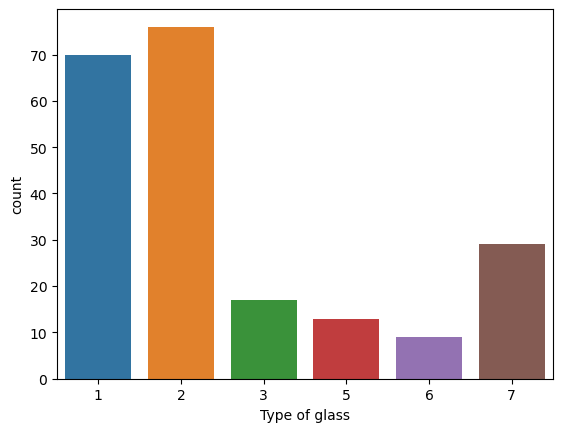

In [11]:
#Counts by Type of glass
print(glass_id['Type of glass'].value_counts())
sns.countplot(x ='Type of glass', data=glass_id)

Observation:

The 'building_windows_non_float_processed (2)' has the highest counts by Type of glass follow by 'building_windows_float_processed (1)' while the least Type of glass by counts are 'containers (5)' and 'tableware(6)'.

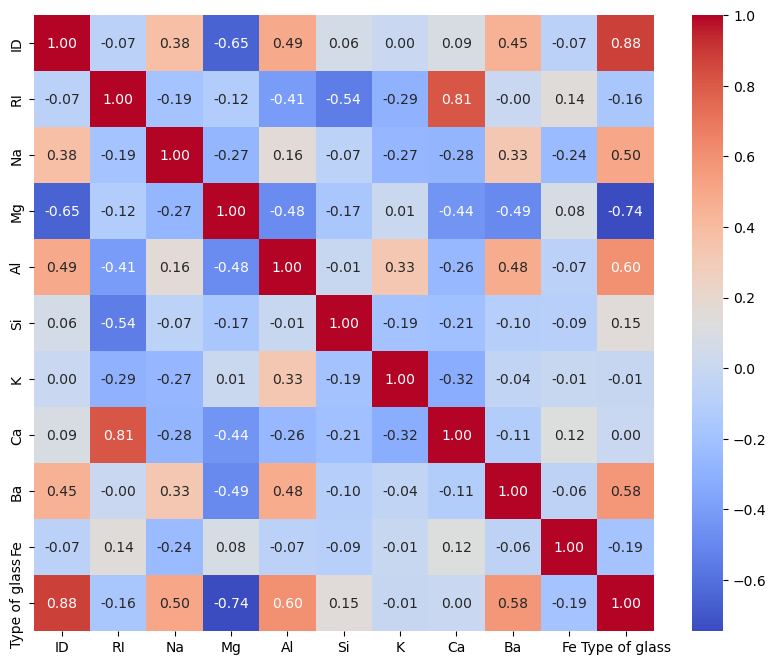

In [12]:
#find the contribution of each chemical component to the Type of glass
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(glass_id.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [13]:
#Statistical interpretation of the Dataset
glass_id.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [14]:
cor_glass =glass_id.corr()
cor_glass

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
ID,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


In [15]:
cor_glass['Type of glass'].sort_values(ascending=False)

Type of glass    1.000000
ID               0.877357
Al               0.598829
Ba               0.575161
Na               0.502898
Si               0.151565
Ca               0.000952
K               -0.010054
RI              -0.164237
Fe              -0.188278
Mg              -0.744993
Name: Type of glass, dtype: float64

Observation:

The dataset shows that some of the chemical component like "Barium", "Alunimum", "Sodium", "Silicon" and Calcium have positive correlation with glass types and while "Potassium". "Iron" and "Magnesium" have negative correlation with glass types.

In [16]:
#Data Skewness
cor_glass.skew()

ID              -0.014073
RI               1.291823
Na               1.054240
Mg               1.662479
Al               0.218847
Si               1.964791
K                2.042348
Ca               1.366612
Ba               0.427334
Fe               2.565068
Type of glass   -0.255762
dtype: float64

The data show postitive skewness, meaning most datas tend toward the right. It shows the direction of the outliers.

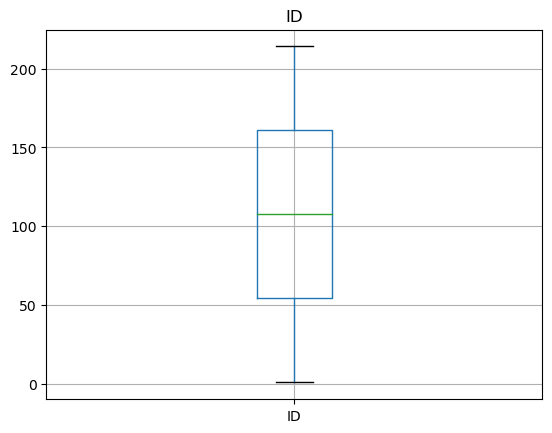

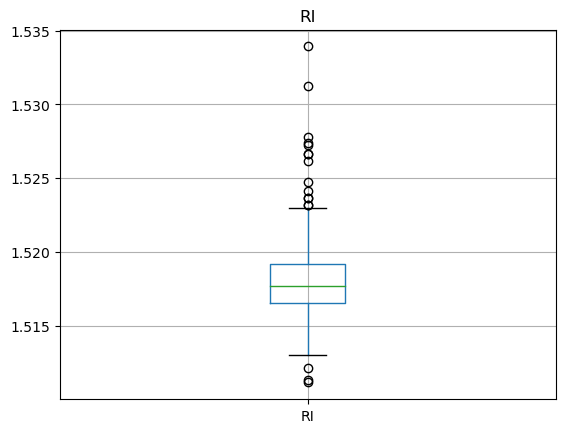

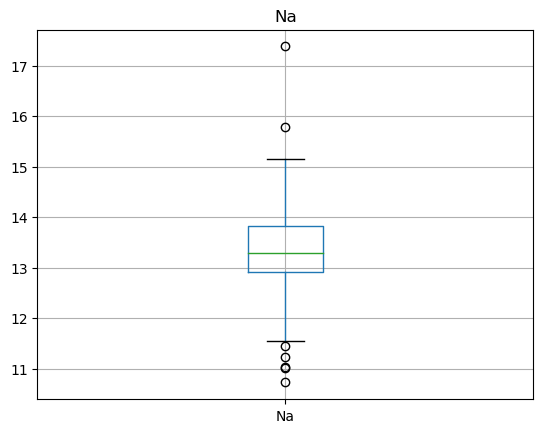

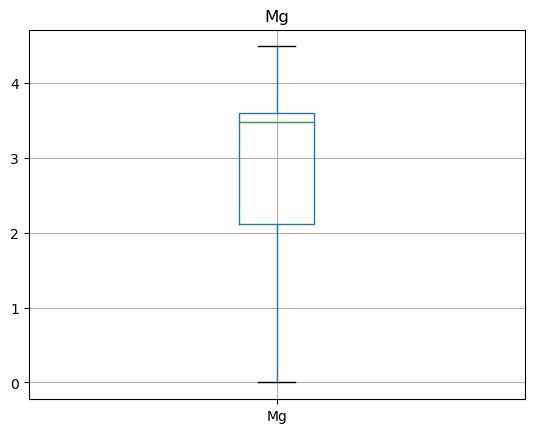

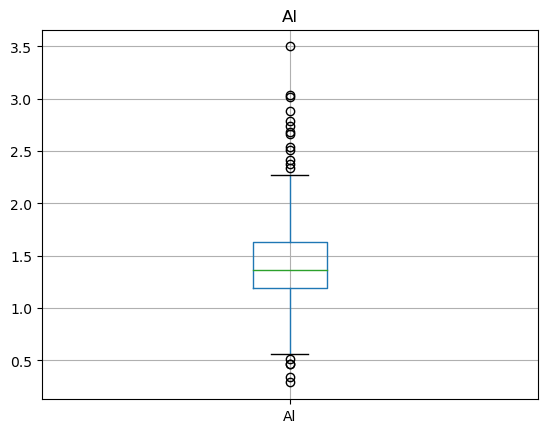

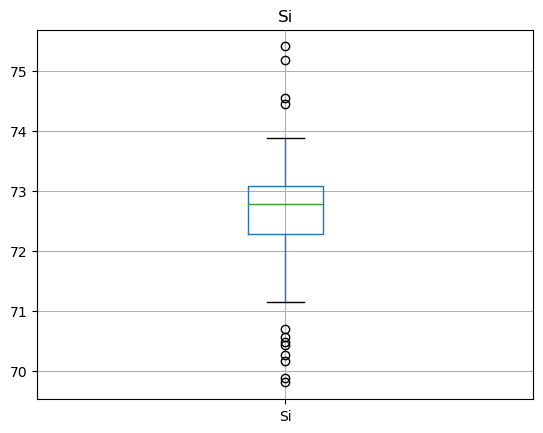

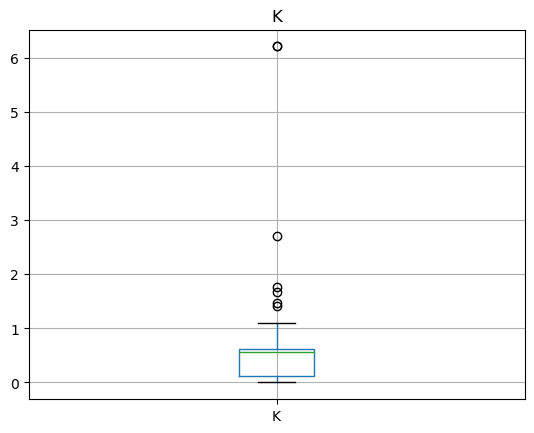

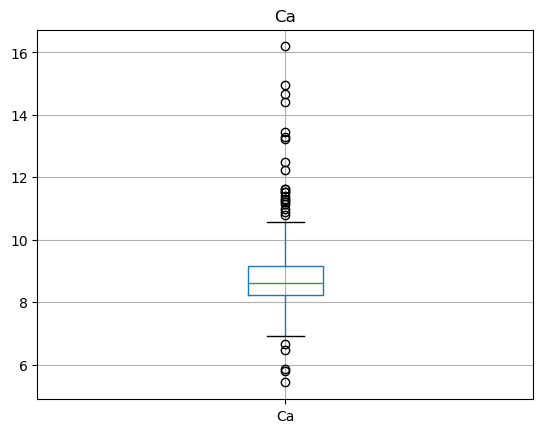

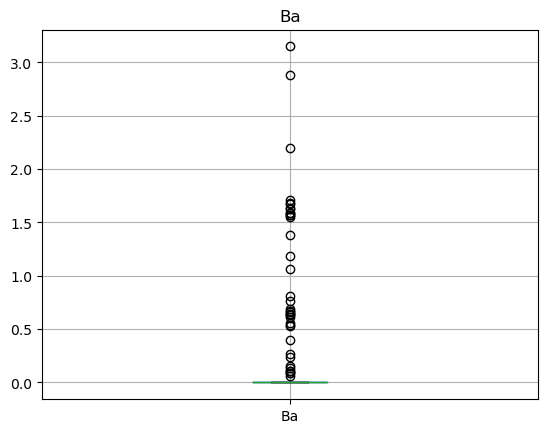

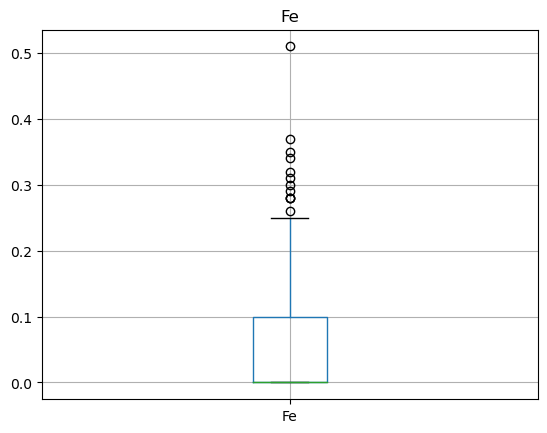

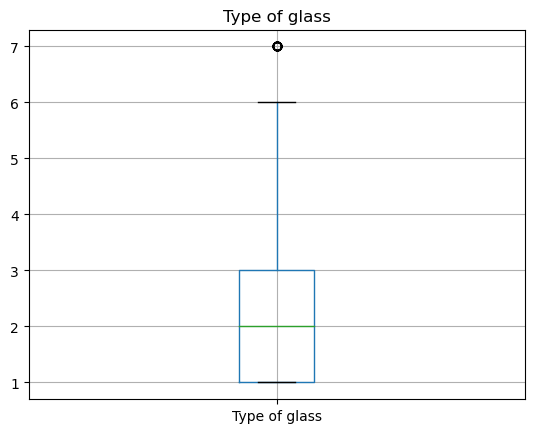

In [17]:
# Draw boxplot for each column.
for column in glass_id:
    if column in glass_id:
        plt.figure()
        plt.gca().set_title(column)
        glass_id.boxplot([column])

In [18]:
# Define input features and target variable
x = glass_id.drop(["Type of glass","ID"], axis=1)
y= glass_id["Type of glass"]

In [19]:
# Create binary target variable (Window glass=1 (classes 1-4) and non-window glass=2 (classes 5-7))
y = y.apply(lambda x: 2 if x >= 5 else 1)

In [20]:
y.value_counts()

1    163
2     51
Name: Type of glass, dtype: int64

In [21]:
# Feature scaling using standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


Dataset Splitting and Training:

In [22]:
# Spliting the data into Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Training and Evaluation:

1. Stochastic Gradient Descent (SGD):

In [23]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

sgd.score(x_train, y_train)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)

acc_sgd

92.98

2. Random Forest:

In [24]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

Y_pred = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0

 3. Logistic Regression:

In [25]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

94.74

4. K Nearest Neighbor:

In [26]:
knn =KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train) 
Y_pred = knn.predict(x_test) 
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

97.08

5. Gaussian Naive Bayes:

In [27]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)
Y_pred =gaussian.predict(x_test) 
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

90.64

6. Perceptron: 

In [28]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

Y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

91.23

7. Linear Support Vector Machine:

In [29]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

94.15

8. Decision Tree:

In [30]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

100.0

Which is the best Model?

In [31]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
97.08,KNN
94.74,Logistic Regression
94.15,Support Vector Machines
92.98,Stochastic Gradient Decent
91.23,Perceptron
90.64,Naive Bayes


As we can see, Random Forest has the best Score ranked the 1st on the table, indicating the best model.

In [32]:
#cross validation for Random forest
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=42)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.94117647 1.         0.94117647 1.         0.94117647
 1.         0.88235294 0.88235294 0.94117647]
Mean: 0.930718954248366
Standard Deviation: 0.06550311015094143


In [33]:
from sklearn.model_selection import cross_val_score
rf = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.94117647 1.         0.94117647 1.         1.
 0.88235294 0.94117647 0.76470588 1.        ]
Mean: 0.9248366013071895
Standard Deviation: 0.08513056214153887


The Mean Score for Random forest Classifier Model has Mean Score 93% while that of the Decision Tree is 92%.Hence the Random forest give more accurate prediction.

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [35]:
# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')

In [36]:
# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best ROC AUC Score: {grid_search.best_score_}')


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best ROC AUC Score: 0.9477513227513228


The ROC Curve final model shows the AUC score for the model to be of 85%

# Final Model:


In [37]:
# PREDICTION OF TEST RESULT
pred_random_forest = random_forest.predict(x_test)
print('Predictions:\n', pred_random_forest)

Predictions:
 [1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2
 1 1 2 1 2 1]


In [38]:
# COMPARING TEST DATA AND PREDICTED DATA
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":pred_random_forest})
print('Actual test data vs predicted: \n', comparison_df)

Actual test data vs predicted: 
      Actual  Predicted
9         1          1
197       2          2
66        1          1
191       2          2
117       1          1
111       1          1
15        1          1
86        1          1
75        1          1
144       1          1
182       2          2
170       2          1
141       1          1
73        1          1
178       2          2
167       2          2
190       2          2
18        1          1
45        1          1
184       2          2
98        1          1
209       2          2
211       2          2
195       2          2
148       1          1
104       1          1
30        1          1
25        1          1
175       2          1
16        1          1
55        1          1
138       1          1
158       1          1
93        1          1
69        1          1
203       2          2
171       2          2
152       1          1
97        1          1
84        1          2
101       1          1
2